# Plot Tone

In [1]:
NAME = '08-02_descriptives_plot_tone'
PROJECT = 'conference-calls-sentiment'
PYTHON_VERSION = '3.7.0'

### Imports  

In [2]:
import os
import re
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import paper_style

### Settings

In [3]:
%config InlineBackend.figure_format='svg'

In [4]:
workdir = re.sub("(?<={})[\w\W]*".format(PROJECT), "", os.getcwd())
os.chdir(workdir)

pipeline = os.path.join('2_pipeline', NAME)
if not os.path.exists(pipeline):
    os.makedirs(pipeline)
    for folder in ['out', 'store', 'tmp']:
        os.makedirs(os.path.join(pipeline, folder))

---
# Main code
## Tone by Firm

In [ ]:
tone = pd.read_feather(os.path.join('2_pipeline', '04-03_tone_measures', 'out', 'tone_by_firm.feather'))
tone

In [6]:
tone[['lm_tone_norm', 'finbert_tone_norm']].corr()

,lm_tone_norm,finbert_tone_norm
lm_tone_norm,1.000000,0.709726
finbert_tone_norm,0.709726,1.000000


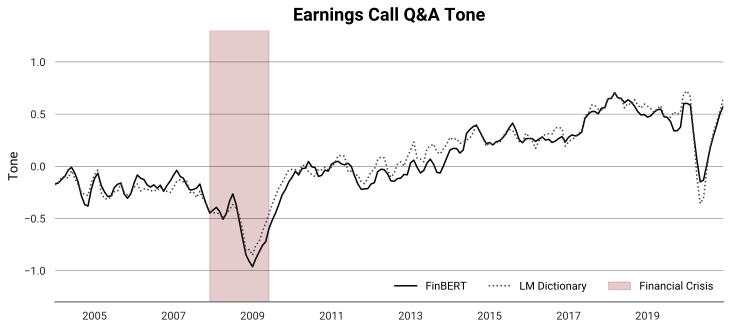

In [7]:
fig, ax = plt.subplots()

(tone.groupby(pd.Grouper(key='event_date', freq='M'))
     .agg(finbert=('finbert_tone_norm', np.mean),
          dictionary=('lm_tone_norm', np.mean))
     .rolling(3, min_periods=1).mean()
     .dropna()
     .plot(ax=ax))

# Financial Crisis
ax.axvspan('2007-12', '2009-06', color='maroon', alpha=0.2)

# Titles and labels
ax.set_title('Earnings Call Q&A Tone')
ax.set_xlabel('')
ax.set_ylabel('Tone')

# Legend
ax.legend(['FinBERT', 'LM Dictionary', 'Financial Crisis'], loc=4, ncol=3)

# Grid and limits
ax.grid(axis='x')
ax.set_ylim(-1.3, 1.3)

fig.savefig(os.path.join('3_output', 'figures', 'tone.pdf'), bbox_inches='tight')

## Tone by Role

In [ ]:
tone_by_role = pd.read_feather(os.path.join('2_pipeline', '04-03_tone_measures', 'out', 'tone_by_role.feather'))
tone_by_role

In [9]:
analysts_tone = tone_by_role[tone_by_role['speaker_role'] == 'Analyst'].copy()
management_tone = tone_by_role[tone_by_role['speaker_role'] == 'Management'].copy()

In [10]:
management_tone[['lm_tone_norm', 'finbert_tone_norm']].corr()

,lm_tone_norm,finbert_tone_norm
lm_tone_norm,1.000000,0.663142
finbert_tone_norm,0.663142,1.000000


In [11]:
analysts_tone[['lm_tone_norm', 'finbert_tone_norm']].corr()

,lm_tone_norm,finbert_tone_norm
lm_tone_norm,1.000000,0.492484
finbert_tone_norm,0.492484,1.000000


ipykernel_launcher:26: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000001C4F6D68B38> has a label of '_' which cannot be automatically added to the legend.
ipykernel_launcher:26: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000001C4F6CCC438> has a label of '_' which cannot be automatically added to the legend.


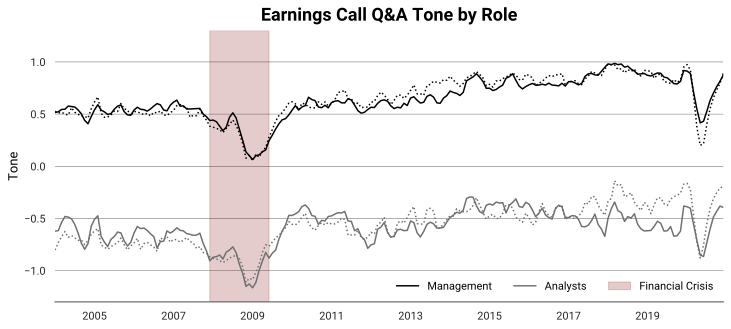

In [14]:
fig, ax = plt.subplots()

(management_tone.groupby(pd.Grouper(key='event_date', freq='M'))
                .agg(Management_FinbERT=('finbert_tone_norm', np.mean),
                     Management_LM=('lm_tone_norm', np.mean))
     .rolling(3, min_periods=1).mean()
     .dropna()
     .plot(ax=ax, color='black'))

(analysts_tone.groupby(pd.Grouper(key='event_date', freq='M'))
              .agg(Analysts_FinBERT=('finbert_tone_norm', np.mean),
                   Analysts_LM=('lm_tone_norm', np.mean))
              .rolling(3, min_periods=1).mean()
              .dropna()
              .plot(ax=ax, color='#707070'))

# Financial Crisis
ax.axvspan('2007-12', '2009-06', color='maroon', alpha=0.2)

# Titles and labels
ax.set_title('Earnings Call Q&A Tone by Role')
ax.set_xlabel('')
ax.set_ylabel('Tone')

# Legend
ax.legend(['Management', '_', 'Analysts', '_', 'Financial Crisis'], loc=4, ncol=3)

# Grid and limits
ax.grid(axis='x')
ax.set_ylim(-1.3, 1.3)

# Save
fig.savefig(os.path.join('3_output', 'figures', 'tone_role.pdf'), bbox_inches='tight')